In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

from scipy.stats import median_abs_deviation as mad

from local_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# WS_file = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/WE__0133___________DER_WS__________________P01.xml'
which_sol = "0107"
path = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/'
WS_file = path + 'WE__%s___________DER_WS__________________P02.xml' % (which_sol)

time, wind = retrieve_time_wind(WS_file, start_time=datetime(1900, 1, 1, 9, 0, 0), end_time=datetime(1900, 1, 1, 10, 0, 0))
wind *= 100. # Convert to cm/s

Processing label: /Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/WE__0107___________DER_WS__________________P02.xml
Now processing a Header structure: HEADER
Now processing a Table_Delimited structure: TABLE


37.2146039469466 6.083716081851406 97.39422323016589 54.434329691159455
-0.14740526328618841 341.340492565423 2315.6601396431


ValueError: supplied range of [6.070293737719479e-64, inf] is not finite

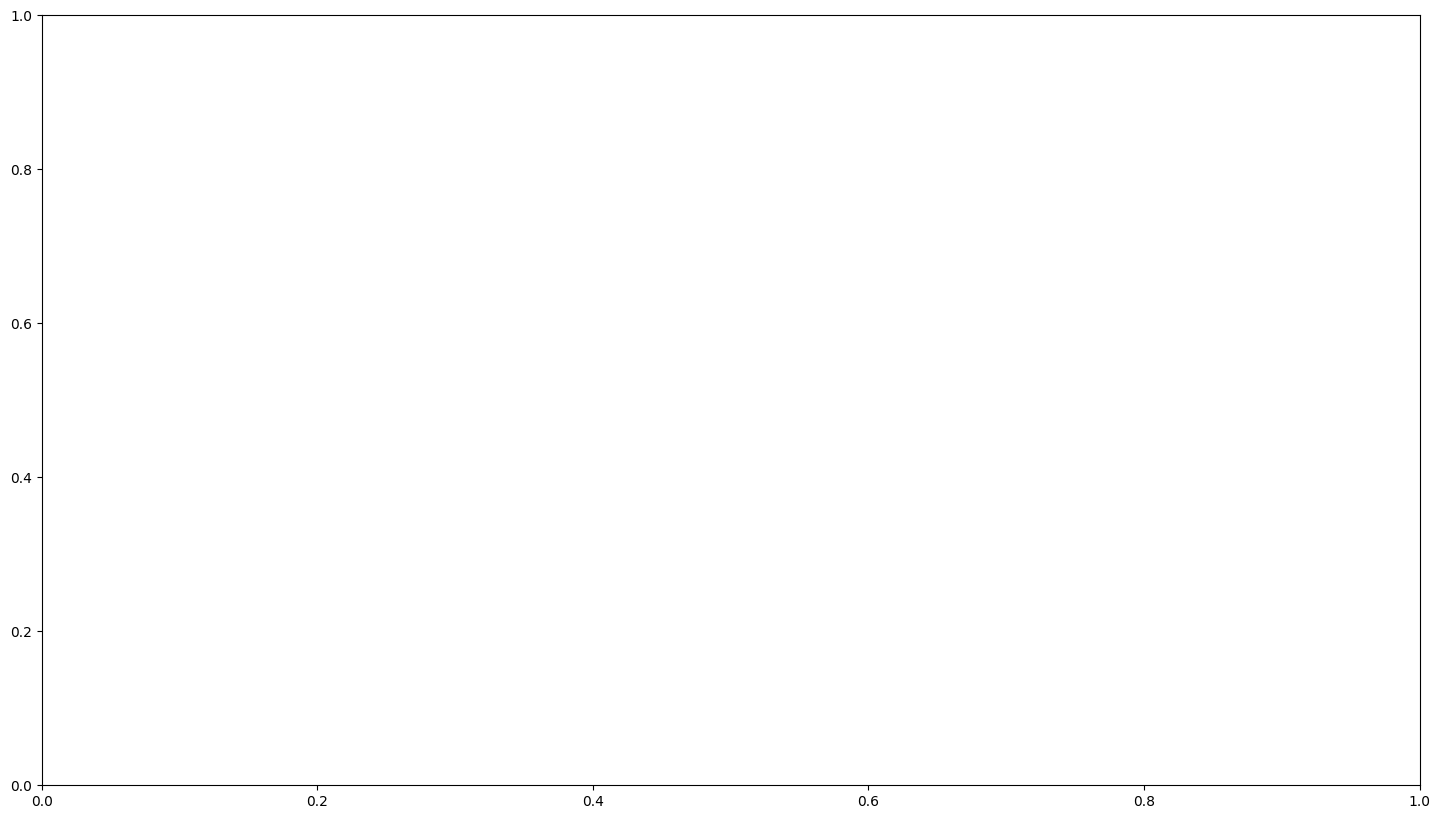

In [18]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot(111)
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)

saved_zstar = 10. # cm
t0 = np.min(time)
ind = retrieve_relevant_times(time, t0, len(zs)*sample_time)
saved_ustar = kappa*np.median(wind[ind])/np.log(zs[0]/saved_zstar)

scaled_windspeeds = create_synthetic_wind_profile(wind, zs, saved_zstar, z0=np.min(zs))
t0 = np.min(time)
averaged_windspeeds, std_windspeeds = sample_wind_profile(sample_time, t0, time, scaled_windspeeds, zs)
ax1 = make_plot_of_original_and_scaled_windspeeds(time, wind, zs, sample_time, t0, scaled_windspeeds, 
                                                  averaged_windspeeds, ax1)

### Fit synthetic wind profile ###

# inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,\
#     outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds,\
#     popt, unc, pcov = fit_wind_profile_and_drop_outliers(zs, averaged_windspeeds, std_windspeeds,
#                                                          drop_outliers=False, num_sigma=5., rescale_unc=True,
#                                                          consider_scaled_uncertainties=False)

# ustar, zstar, sigma_ustar, sigma_zstar = collect_fit_values_and_unc(popt, unc, pcov)
# print(ustar, zstar, sigma_ustar, sigma_zstar)
# ax2 = make_plot_of_wind_data_and_profile(inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,
#                                          outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds, 
#                                          popt, unc, pcov, ax2)

# ax2 = make_plot_of_wind_data_and_profile(inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,
#                                          outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds, 
#                                          popt, unc, pcov, ax2)


# Check uncertainties
num_points = 1000
slope_dist = popt[0] + normal(size=num_points, scale=unc[0])
intercept_dist = popt[1] + normal(size=num_points, scale=unc[1])

ustar_dist = calc_ustar_from_slope(slope_dist)
zstar_dist = calc_zstar_from_slope_and_intercept(np.min(zs), slope_dist, intercept_dist)

ind = np.argmax(zstar_dist)
print(slope_dist[ind], intercept_dist[ind], -intercept_dist[ind]/slope_dist[ind])

# ax.hist(ustar_dist, bins='auto')
# ax.axvline(ustar, color=BoiseState_orange)

ax.hist(zstar_dist, bins='auto')
ax.axvline(zstar, color=BoiseState_orange)

# ax2.plot(wind_profile(zs, saved_ustar, saved_zstar), zs)

# ax2.text(0.05, 0.725, r'Correct $u_\star = %.0f\, {\rm cm\ s^{-1}}$' % (saved_ustar), 
#          fontsize=28, transform=ax2.transAxes)
# ax2.text(0.05, 0.675, r'Correct $z_\star = %.0f\, {\rm cm}$' % (saved_zstar), 
#          fontsize=28, transform=ax2.transAxes)

# ax1.set_xlim([np.min(time), np.min(time) + timedelta(seconds=len(zs)*sampling_duration)])
# fig.savefig("Synthetic_Mars_Wind_Profile_Sol133.jpg", dpi=300, bbox_inches="tight")